# Movie Recommendation System 

**Project Members**
- Amit Dilip Kini
- Ashini Anantharaman
- Niranjana Sathish Avilery
- Praveen Chandrasekaran
- Vigneshwaran Ravichandran

In [1]:
# Libraries for data file processing 
import os

# libraries for special vizualization 
import wordcloud # for visualizing the frequency of the words in the dataset
from wordcloud import STOPWORDS # set of strings that will not be taken into consideration 
from wordcloud import WordCloud # To create a word cloud image with the frequent words 

# Essential librarires
import pandas as pd # for data analysis 
import numpy as np # for mathematical operations on arrays
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for custom data visualization

# To ignore warnings that may pop up
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Settings for visualization  
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)

# Color palette for the visualiztion
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

## Data Preprocessing

**Summary:**
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

In [3]:
# Contributor/s: Praveen 

# DAT file declaration - Ratings data
rating_dat_file = 'https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/dat_files/ratings.dat'# variable contains the name of the dat file to be used 

# Read the Ratings File:.join() helps in accessing the specified data file, Delimiter in dataset specified, python engine to support regex separators,
# UTF-8 usual encoder to convert chars to binary
# ratings_data = pd.read_csv(os.path.join("dat_files", rating_dat_file), sep="::",engine="python", encoding ="UTF-8",
#                     names=["user_id", "movie_id", "rating", "timestamp"])# Specifying list of column names to use
ratings_data = pd.read_csv(rating_dat_file, sep='::', engine='python', encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Printing the status of 
print("Loading.. ", len(ratings_data))# prints the No. of rows of the dataset specified using len() 

Loading..  1000209


In [4]:
# Contributor/s: Praveen 
# DAT file declaration - Movies data 
# movies_dat_file = 'movies.dat'
movies_dat_file_url='https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/dat_files/movies.dat'
# Read the Movies File
movies_data = pd.read_csv(movies_dat_file_url, sep='::', engine='python', encoding='latin-1',
                    names=["movie_id", "title", "genres"])

print("Loading.. ", len(movies_data))

Loading..  3883


In [5]:
# Contributor/s: Praveen 
# DAT file declaration - Users data 
# users_dat_file = 'users.dat'
users_dat_file_url='https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/dat_files/users.dat'
# Read the Users File
users_data = pd.read_csv(users_dat_file_url, sep='::', engine='python', encoding='latin-1',
                    names=["user_id", "gender", "age", "occupation", "zipcode"])

print("Loading.. ", len(users_data))
print()
# Displaying the dataset
print("Current Users dataframe that is numerically encoded: ")
users_data.head()

Loading..  6040

Current Users dataframe that is numerically encoded: 


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


It can be seen from the above users dataframe that the occupation feature is numericaly encoded and the age is categorized as mentioned below:

**Code for Age groups** 
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
    
**Code for Occupation**    
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [6]:
# Contributor/s: Praveen 

# Categorizing the age and occupation columns based on the information provided above, dictinary data structure is used 
# for key value pairs. These categories are clearly mentioned by the data source.  

# Creating a dictionary for age category
age_category = { 1: "Under 18", 
                18: "18-24", 
                25: "25-34", 
                35: "35-44", 
                45: "45-49", 
                50: "50-55", 
                56: "56+"}

# Creating a dictionary for occupation category 
occupation_category = {0: "other or not specified",
                       1: "academic/educator",
                       2: "artist", 
                       3: "clerical/admin",
                       4: "college/grad student", 
                       5: "customer service", 
                       6: "doctor/health care",
                       7: "executive/managerial", 
                       8: "farmer", 
                       9: "homemaker", 
                       10: "K-12 student", 
                       11: "lawyer",
                       12: "programmer", 
                       13: "retired", 
                       14: "sales/marketing", 
                       15: "scientist", 
                       16: "self-employed",
                       17: "technician/engineer", 
                       18: "tradesman/craftsman", 
                       19: "unemployed", 
                       20: "writer"}

# Creating new cloumns with updated values/category info using lambda function on each datapoint for both features
users_data['age_group'] = users_data['age'].apply(lambda x: age_category[x])# Applies approriate age group w.r.t the "key"  
users_data['occupation'] = users_data['occupation'].apply(lambda x: occupation_category[x])# Applies approriate occupation w.r.t "key" 

# Displays resultant dataframe 
print("Processed resultant dataframe: ")# Prints the message
users_data.head()# Shows the first 5 observations in the dataset

Processed resultant dataframe: 


,user_id,gender,age,occupation,zipcode,age_group
0,1,F,1,K-12 student,48067,Under 18
1,2,M,56,self-employed,70072,56+
2,3,M,25,scientist,55117,25-34
3,4,M,45,executive/managerial,02460,45-49
4,5,M,25,writer,55455,25-34


#### Saving data into respective csv files

In [7]:
# Contributor/s: Praveen 

# to_csv() function is used to write object to a comma-separated values (csv) --> rating.csv
# Absolute or relative path is specified, \t in a string literal is an escape sequence for tab character to seperate, 
# header to mention that we are passing a list of columns to specify, encoding is usual UTF-8 
ratings_data.to_csv("ratings_data.csv", sep='\t', header=True, encoding='utf-8', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp'])# Specifying the column names

# Prints the status of the save
print("rating_data.csv saved in directory..")

rating_data.csv saved in directory..


In [8]:
# Contributor/s: Praveen 

# to_csv() function is used to write object to a comma-separated values (csv) --> movies.csv
# Absolute or relative path is specified, \t in a string literal is an escape sequence for tab character to seperate, 
# header to mention that we are passing a list of columns to specify, encoding is usual UTF-8 
movies_data.to_csv("movies_data.csv", sep='\t', header=True, encoding='utf-8', 
               columns=["movie_id", "title", "genres"])# Specifying the column names

# Prints the status of the save
print("movies_data.csv saved in directory..")

movies_data.csv saved in directory..


In [9]:
# Contributor/s: Praveen 

# to_csv() function is used to write object to a comma-separated values (csv) --> users.csv
# Absolute or relative path is specified, \t in a string literal is an escape sequence for tab character to seperate, 
# header to mention that we are passing a list of columns to specify, encoding is usual UTF-8 
users_data.to_csv("users_data.csv", sep='\t', header=True, encoding='utf-8', 
               columns=["user_id", "gender", "age", "occupation", "zipcode"])# Specifying the column names

# Prints the status of the save
print("users_data.csv saved in directory..")

users_data.csv saved in directory..


## Exploratory Data Analysis
- Exploratory data analysis is a way to better understand the data which helps in further data preprocessing. And data visualization is a key step involved in this process of analysis.

In [10]:
# Contributor/s: Praveen 

# Above datasets in dictionary  
data_list = {"Movies dataset: ":movies_data,"Ratings dataset: ": ratings_data,"Users dataset: ": users_data}

# Iterating over the above dictionary of key, value pairs, using .items() method to get access to the key, value pairs
# these key, value pairs are in tuples 
for key, value in data_list.items():
    
    print(key)# Prints the name of the dataset 
    print(value.head())# Prints the dataset mentioned above
    print()# empty line
    print(value.info())# Prints info of the dataset, like dtypes, non-null values, no. of observations
    print("*******************************************************************************************************************")

Movies dataset: 
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
*******************************************************************************************************************
Ratings dataset: 
   user_id  movie_id  rating

**Observation**: From the above dataframes we can see that we do not have null values in any, however we do have some features like timestamp and age in ratings and users dataset respectively which can be dropped. Year and genere info can be pulled from the features in movies dataset where the generes for each movie is delimited by pipes. Apprently the pincode information that is available in users dataset seems interesting to play with.

### Data cleaning

In [11]:
# Contributor/s: Praveen 

# Merging datasets as a single dataframe
lens_data = pd.merge(pd.merge(left=ratings_data,right=users_data), movies_data)# merge() joins dataframes using common column as a key

# Pulling year information and adding as a new column 
movie_release_year_string = lens_data["title"].apply(lambda x: x.split(" ")[-1][1:-1])# Splits each observation w.r.t space and gets takes the last index
movie_release_year = movie_release_year_string.apply(lambda x: int(x))# casts each "year" string into int type  


lens_data["movie_release_year"] = movie_release_year # Adds a new colummn into the lens_data set

# Cleaning title feature by removing the year String
lens_data["movie_title"] = lens_data["title"].apply(lambda x: x.split("(")[0])# Splits each title w.r.t the "(" and takes the 0th index

# Dropping the features that are not required
lens_data.drop(["timestamp","age","title"], axis=1, inplace=True) #Inplace = True deletes from the original, to be careful

# Re-ordering the columns
lens_data = lens_data[["movie_id", "movie_title", "movie_release_year",
           "genres","rating", "user_id", "gender",
           "age_group","occupation", "zipcode"]]

# Resultant dataframe
lens_data.tail() # Shows the tail of the dataframe

,movie_id,movie_title,movie_release_year,genres,rating,user_id,gender,age_group,occupation,zipcode
1000204,2198,Modulations,1998,Documentary,5,5949,M,18-24,technician/engineer,47901
1000205,2703,Broken Vessels,1998,Drama,3,5675,M,35-44,sales/marketing,30030
1000206,2845,White Boys,1999,Drama,1,5780,M,18-24,technician/engineer,92886
1000207,3607,One Little Indian,1973,Comedy|Drama|Western,5,5851,F,18-24,writer,55410
1000208,2909,"Five Wives, Three Secretaries and Me",1998,Documentary,4,5938,M,25-34,academic/educator,35401


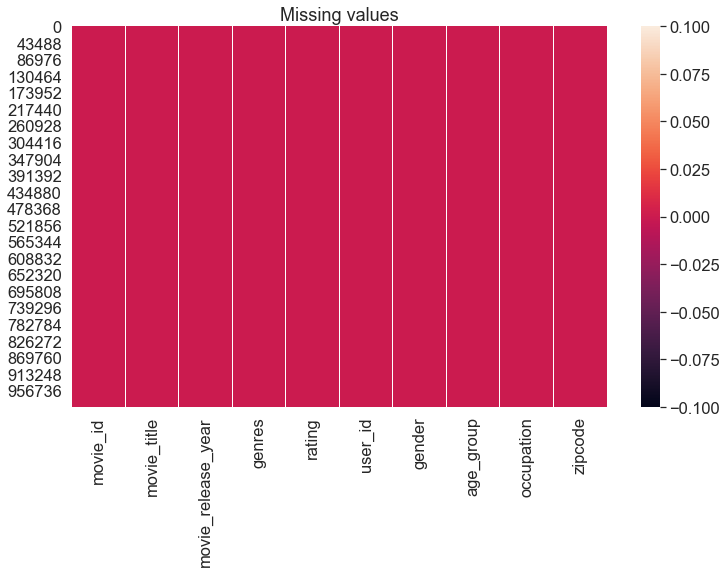

In [12]:
# Contributor/s: Praveen 

# Checking for missing data using the seaborn's heatmap 
sns.heatmap(lens_data.isnull()).set_title("Missing values") # isnull() checks if we have any null values

# Shows the plot
plt.show()

**Observation:** No missing values found in the above heatmap

As the first step, we wanted to list down the question that came to our mind after looking at the processed dataframe. This helped us get a clear understanding of the observations and helped us formulate the problem statement.

## Questions listed after brainstorming 

In [13]:
# Praveen, Ashini, Niranjana, Amit, Vigneshwaran

# Do science fiction movies tend to be rated more highly than other movie genres?
# Which genres were more dominant in each decade of the range available in the dataset?
# Is there a correlation between the year of release of a movie and the genre?a
# What are the top 10 most rated movies?
# What are the most popular Movie Genres among Males and Females?
# What are the Max/Min number of Movies rated by One user?
# What Genre is associated with the most Movies?
# What are the Distribution of Ratings per Genre?
# most common occupation amongst the users
# What’s the Age Distribution by Gender?
# Movies are rated on a 1-5 scale. What is the average movie rating? 
# How many of the users are artists or belong to or closely related to the film industry?
# What is the zip code of the user who rated the most movies?
# What interesting stories using the data in movielens dataset you would like to tell a studio executive/movie producer? genres

### Utilities
Will contain the below stuff for data visualization and modelling:
<br>
- Genre list after splitting the each genre w.r.t "|".
- lens_data2 that contains genres as columns with boolean values

In [14]:
# Listing out the unique genres available in the dataset
splitted_genre_list = lens_data.genres.str.split('|').tolist()
unique_genre_list = pd.DataFrame(splitted_genre_list).stack().unique()
final_genre_list = unique_genre_list.tolist()

# Resultant list of movie genres that are unique 
print("Final list of genres after cleaning and extraction from the database: ")
print()
print(final_genre_list)

Final list of genres after cleaning and extraction from the database: 

['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']


In [15]:
# 2nd dataframe for containing the unique genre columns in boolean data type
lens_data2 = lens_data

# Above processed dataframe is further processed by joining columns that are of boolean data
# type and where the genres column is dropped
lens_data2 = lens_data.join(lens_data2["genres"].str.get_dummies().astype(bool))
lens_data2.drop('genres', inplace=True, axis=1)

# Resultant 2nd dataframe 
lens_data2.head(2)

,movie_id,movie_title,movie_release_year,rating,user_id,gender,age_group,occupation,zipcode,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest,1975,5,1,F,Under 18,K-12 student,48067,False,...,False,False,False,False,False,False,False,False,False,False
1,1193,One Flew Over the Cuckoo's Nest,1975,5,2,M,56+,self-employed,70072,False,...,False,False,False,False,False,False,False,False,False,False


# Data Visualization

## Gender Analysis

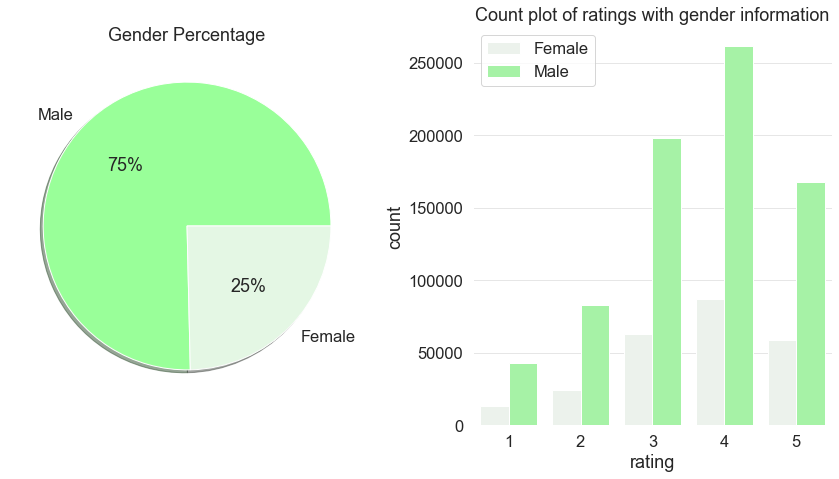

In [16]:
# Contributor/s: Praveen, Ashini

# Pie chart for different classes 
plt.subplot(1,2,1)
classes = ['Male', 'Female']
colors_list = ['#99ff99','#e4f7e4']
plt.pie(lens_data["gender"].value_counts(), labels = classes, autopct='%.0f%%', shadow=True, colors=colors_list)
plt.title("Gender Percentage")

# Count plot of ratings based on gender
plt.subplot(1,2,2)
classes = ['Female', 'Male']
colors = ["blue","red"]
sns.countplot(x="rating", data=lens_data, hue="gender",color="#99ff99")
plt.title("Count plot of ratings with gender information")
plt.legend(classes)

# To show the plot
plt.tight_layout() 
plt.show()

**Observation:** Above pie chart confirms that only 25% of the ratings data comes from the females which makes us feel that the sampling is not random enough. From the available data it is seen that 4 is the most common rating given by males and females. Since more males rated these movies, the ratings data could be biased. 

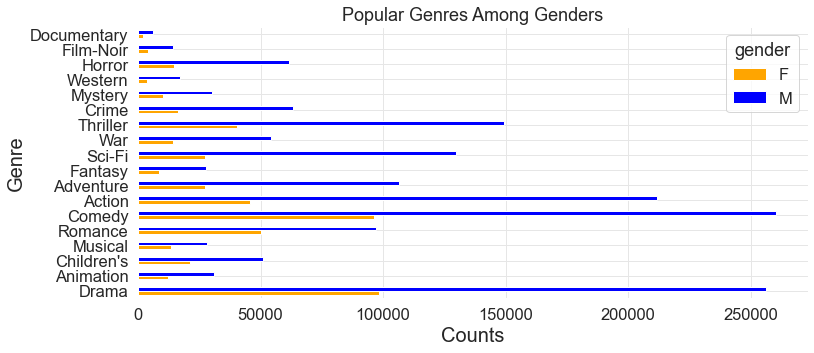

In [17]:
# Contributor/s: Praveen, Niranjana

# Gender is grouped and horizontal bar chart is shown to see the most frequently watched genre
lens_data2[final_genre_list + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,5), color=["orange", "blue"])

# Settings for data viz. 
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.title("Popular Genres Among Genders")

# To show the plot
plt.show()

**Observation**: The ratio of interests shown by male and female on different genres are found to be the same from the above horizontal bar graph. The most popular genre is Comedy and the second being drama 

## Age Analysis

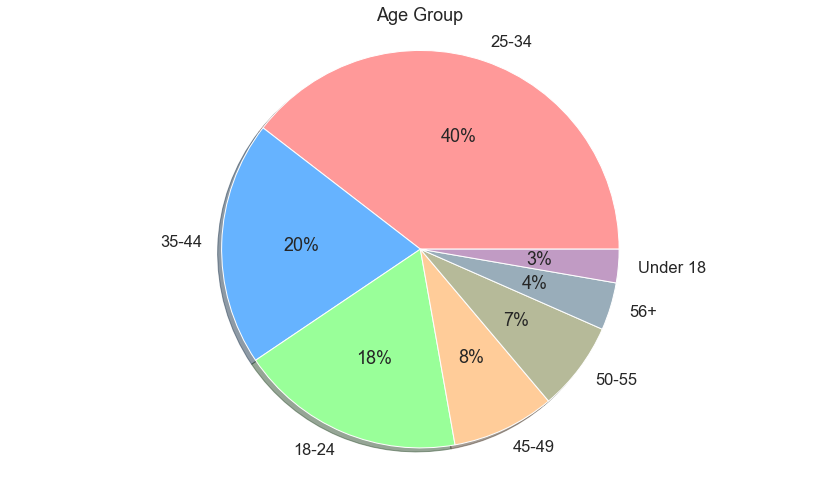

In [18]:
# Contributor/s: Praveen, Vineshwaran

# Visualizing overall age
classes = ['25-34', '35-44', '18-24', '45-49', '50-55', '56+', 'Under 18']
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4']
fig1, ax1 = plt.subplots()
ax1.pie(lens_data["age_group"].value_counts(), autopct='%.0f%%',colors=colors_list,labels=classes, shadow=True)
plt.title("Age Group")

# To show the plot
ax1.axis('equal')
plt.tight_layout() 
plt.show()

**Observation:** Pie chart that shows the percentage of each age group present in the dataset, it is evident that people who are aged around 30 years seem to watch a lot of movies and have provided us with more ratings 

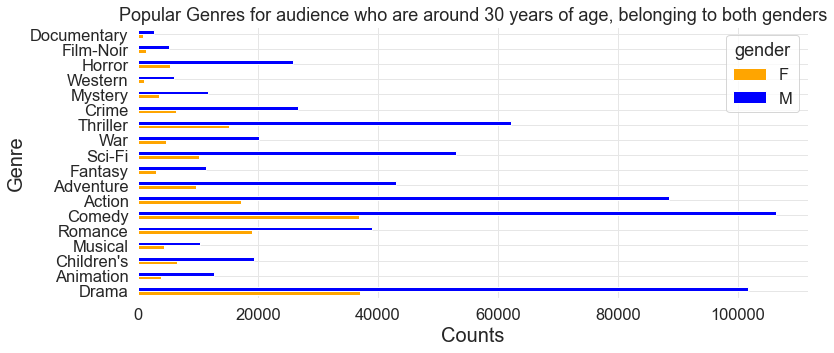

In [19]:
# Contributor/s: Praveen

# Grouping data based on gender who are around 30 years of age and usign the horizontal bar chart to 
# see people's interest for each genre
lens_data2[lens_data2["age_group"] == "25-34"][final_genre_list + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12, 5), color=["orange", "blue"])

# Settings for data viz.
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.title("Popular Genres for audience who are around 30 years of age, belonging to both genders")

# To show the plot
plt.show()

**Observation:** We can see that the most popular genre for people in their late 20's and ealry 30's is comedy

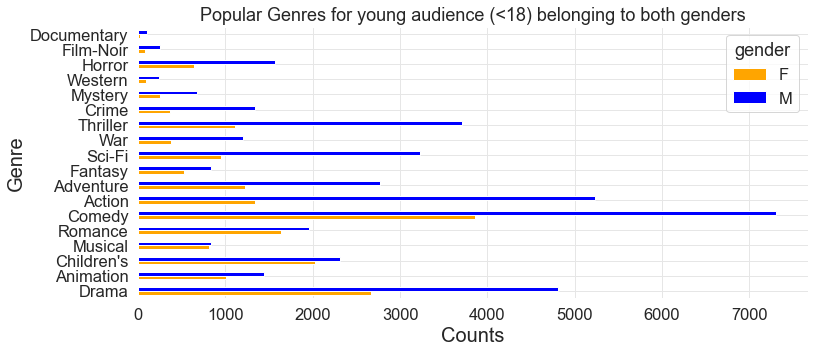

In [20]:
# Contributor/s: Praveen, Niranjana

# Grouping data based on gender who are less than 18 years of age and usign the horizontal bar chart to 
# see people's interest for each genre
lens_data2[lens_data2["age_group"] == "Under 18"][final_genre_list + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12, 5), color=["orange", "blue"])

# Settings for data viz.
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.title("Popular Genres for young audience (<18) belonging to both genders")

# To show the plot
plt.show()

**Observation:** We can see that the most popular genre for the teens and kids are comedy, we can conclude that there is more scope for business in this genre. 

## Genre Analysis

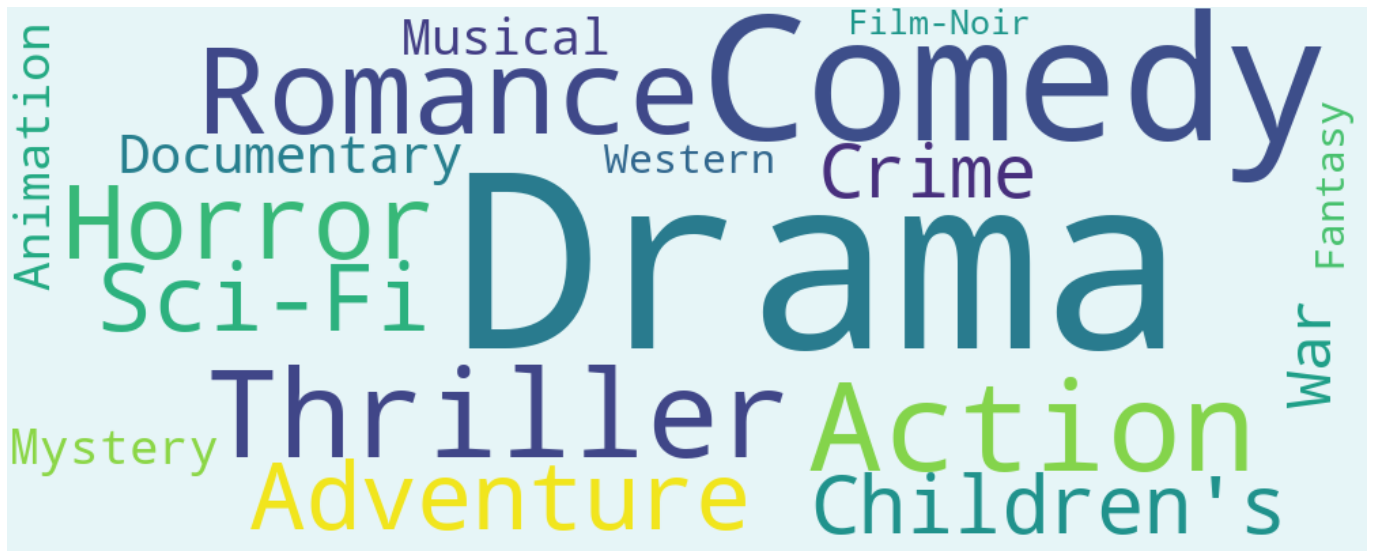

In [21]:
# Contributor/s: Praveen, Amit, Ashini, Vigneshwaran, Niranjana

# Genre labels use set() to contian only unique genres
genre_labels = set()
# Iterating thorough the genres column to split string values
for s in lens_data['genres'].str.split("|").values: # Splits each genre observation w.r.t "|"
    # Each split genre is saved in genre_labels if not in set(s), this is achieved by using .union()
    genre_labels = genre_labels.union(set(s)) # union() returns set containing all items from the original set, and all items from the specified set

# Function to count the number of movies in each genres
def count_word(dataframe, target_coloumn, set_of_genere):
    # Creating empty dictionary to store key, value pairs where key is 
    keyword_count = dict()
    for s in set_of_genere: 
        keyword_count[s] = 0
    for set_of_genere_keywords in dataframe[target_coloumn].str.split('|'):        
        if type(set_of_genere_keywords) == float and pd.isnull(set_of_genere_keywords): 
            continue        
        for s in [s for s in set_of_genere_keywords if s in set_of_genere]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    # Key value paris from the dictionary are added into the list so that the keywords can be sorted by frequency
    keyword_occurences = [] # Empty list ready for appending elements
    for k,v in keyword_count.items(): # For every key and value pair in keyword_count dict
        keyword_occurences.append([k,v]) # The pairs are appended into the list
    keyword_occurences.sort(key = lambda x:x[1], reverse = True) # Elements in the list are sorted w.r.t genre (key)
    return keyword_occurences, keyword_count # Returns result 

# Calling this function gives access to a list of genre keywords which are sorted in decreasing frequency
# keyword_occurences will contain the genres and its respective frequencies in a list
keyword_occurences, dum = count_word(movies_data, 'genres', genre_labels)

# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:30]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud with the specified settings
genre_wordcloud = WordCloud(width=1000, height=400, background_color='#e6f5f7', max_words=1000)
# 
genre_wordcloud.generate_from_frequencies(genres)

# Plots the wordcloud
f, ax = plt.subplots(figsize=(25,10))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

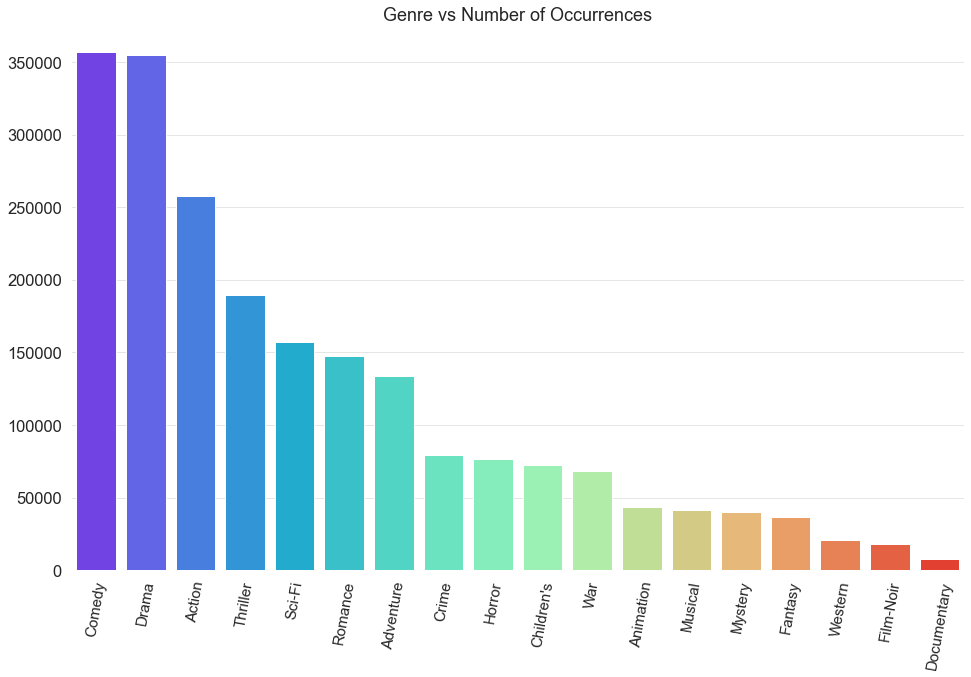

In [22]:
# Contributor/s: Praveen, Amit, Ashini, Vigneshwaran, Niranjana

# Bargraph visualization of same data for accurate measures 

# Splitting the genere to have a set of it
genere_set = set()
for each_entry in lens_data['genres'].str.split('|').values:
     genere_set = genere_set.union(set(each_entry))

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(lens_data, "genres", genere_set)

# Adding respective values into the axes after unpacking the key value pairs from the dictionary created
x_axis=[]
y_axis=[]
for genere,count in keyword_occurences:
    x_axis.append(genere)
    y_axis.append(count)
    
# Data viz. settings 
plt.figure(1, figsize=(16,10))
plt.xticks(rotation=80, fontsize = 15)
sns.barplot(x_axis,y_axis, palette="rainbow")
plt.title("Genre vs Number of Occurrences")
plt.show()

**Observation**: Both the visualizations tells us about frequency of the genres occuring in our dataset, there are lot of movies related to the Comedy and Drama genre.  

## Ratings Analysis

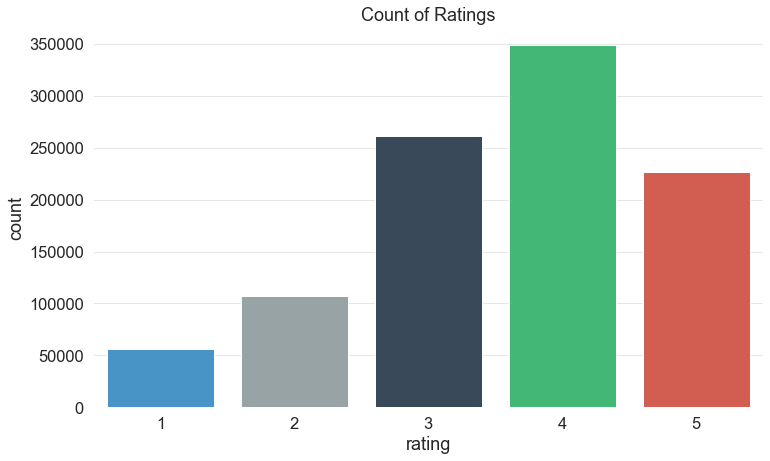

,Percentage breakup of Ratings
Rating 1,5.616
Rating 2,10.753
Rating 3,26.114
Rating 4,34.890
Rating 5,22.626


In [23]:
# Contributor/s: Praveen, Ashini, Niranjana, Amit

# Histogram of ratings data
sns.countplot(x=lens_data.rating, data=lens_data)
plt.title("Count of Ratings")

# To display the plot
plt.show()

# Percentage distribuion of ratings data
ratings_value_counts = round(lens_data["rating"].value_counts(normalize = True)*100,3)
# Saves each value count into the respective ratings variables
rating_5 = ratings_value_counts[5]
rating_4 = ratings_value_counts[4]
rating_3 = ratings_value_counts[3]
rating_2 = ratings_value_counts[2]
rating_1 = ratings_value_counts[1]

# A dictionary containing the key, value pairs are converted into a dataframe and displyed
# This shows the percentage breakup of ratings
pd.DataFrame({"Percentage breakup of Ratings":{
                        "Rating 5": rating_5,
                        "Rating 4": rating_4,
                        "Rating 3": rating_3,
                        "Rating 2": rating_2,
                        "Rating 1": rating_1,}})

**Observation:** We can see that the highest rating provided by the public is 4 and that is the most popular rating of all other ratings which is almost 35% of total count of ratings obtained from the public

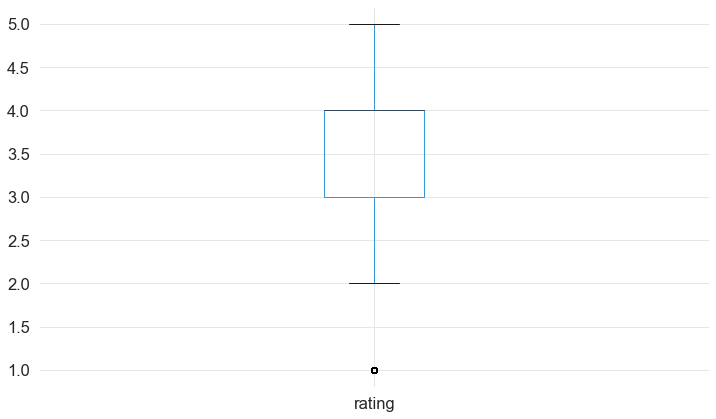

In [24]:
# Boxplot for the overall ratings data
lens_data['rating'].plot(kind='box', subplots=True)
plt.show()

**Observation:** From the above box plot we can see that the median and the mode falls at 4.0

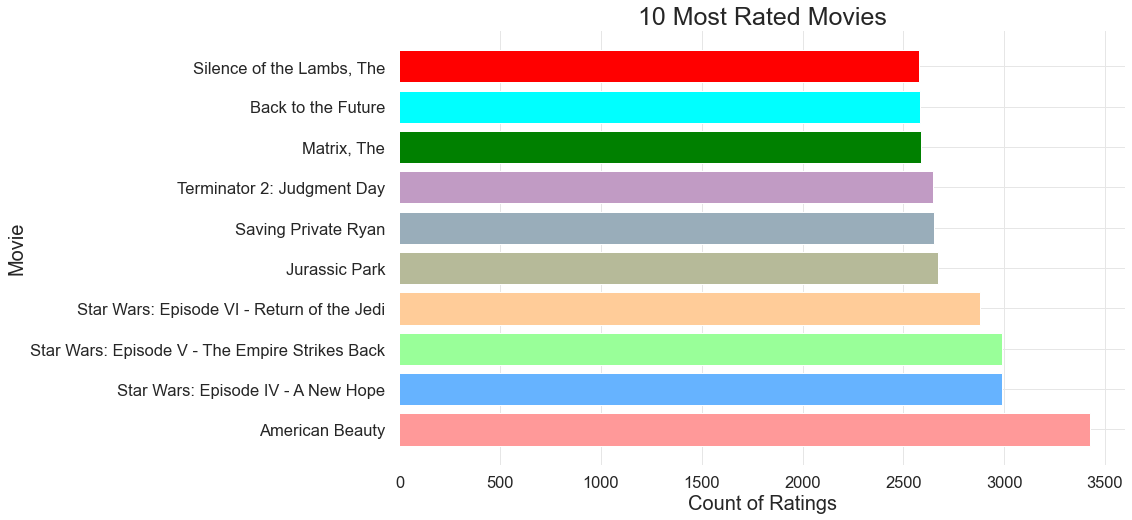

In [25]:
# Contributor/s: Praveen, Amit, Ashini, Vigneshwaran, Niranjana

# Return number of rows associated to each title
top_ten_movies = lens_data.groupby("movie_title").size().sort_values(ascending=False)[:10]

# Plot the counts
plt.figure(figsize=(13, 8))

plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values,
         color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4','green','cyan', 'red'])
plt.title("10 Most Rated Movies", fontsize=25)
plt.ylabel("Movie", fontsize=20)
plt.xlabel("Count of Ratings", fontsize=20)
plt.show()

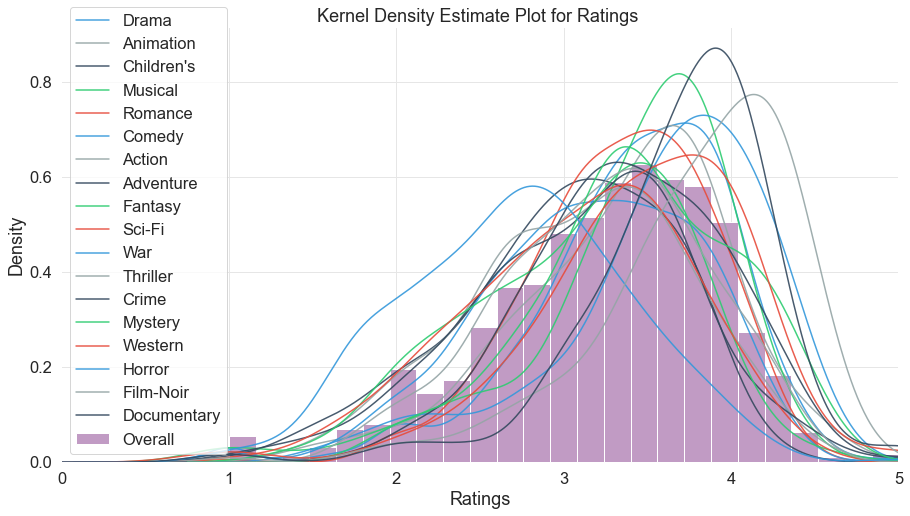

In [26]:
# Contributor/s: Praveen, Ashini, Niranjana

# Dataframe with the unique generes extracted already 
genres_unique = pd.DataFrame(unique_genre_list, columns=['genre'])

# Dataframe to contain the mean ratings and the movie ID
temp = lens_data[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings, density is set to True to get the Kernal Density
temp.hist(bins=25, grid=True, color = "#c19bc4", label ='Overall', figsize=(15,8), density = True)


# KDE plot per genre
for genre in genres_unique.genre:
    temp = lens_data2[lens_data2[genre] == True][['movie_id','rating']].groupby('movie_id').mean()
    temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)

# Data viz. settings
plt.legend()
plt.xlim(0,5)
plt.xlabel('Ratings')
plt.title('Kernel Density Estimate Plot for Ratings ')

# To show the plot
plt.show()

**Observation**: The plot is left-skewed for most genres, except for the war based movies that has got mixed ratings.This shows that people rate movies based on thier likes. 

## Occupation Analysis

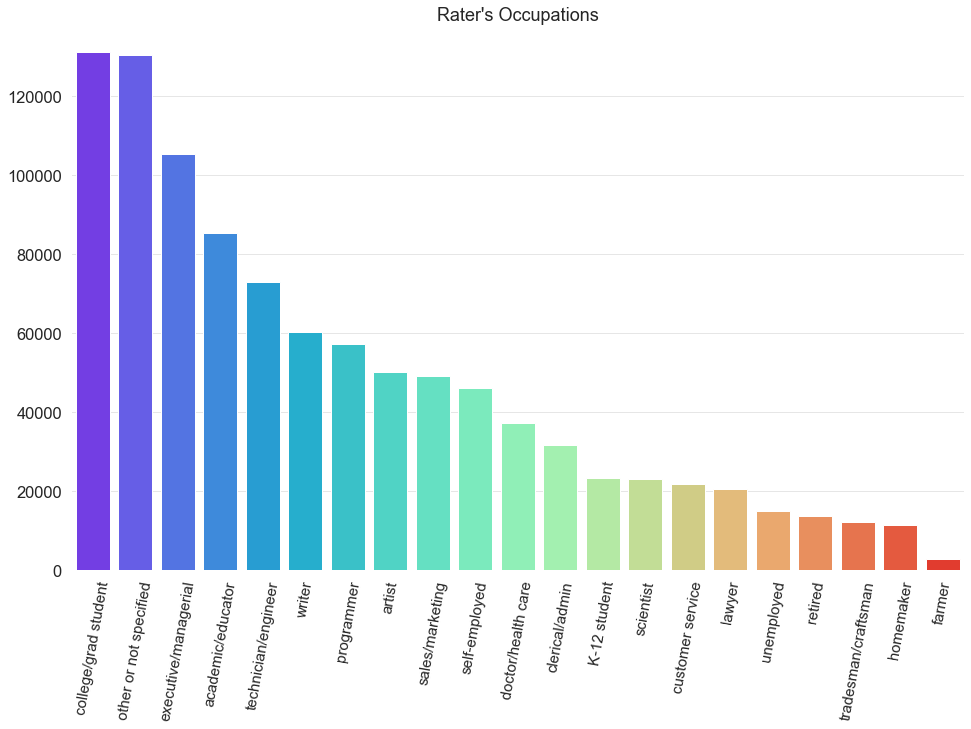

In [27]:
# Contributor/s: Praveen, Amit, Ashini, Vigneshwaran, Niranjana

# Saving name of the occupation and it's respective counts into the variables
occupation_name = lens_data["occupation"].value_counts().index
countof_occuation_name = lens_data["occupation"].value_counts().values

# Data viz. settings 
plt.figure(1, figsize=(16,10))
plt.xticks(rotation=80, fontsize = 15)
sns.barplot(occupation_name,countof_occuation_name, palette="rainbow")
plt.title("Rater's Occupations")

# To show the plot
plt.show()

**Obseravtion**: As expected the main group that contributes for the ratings data, belongs to the student community. 

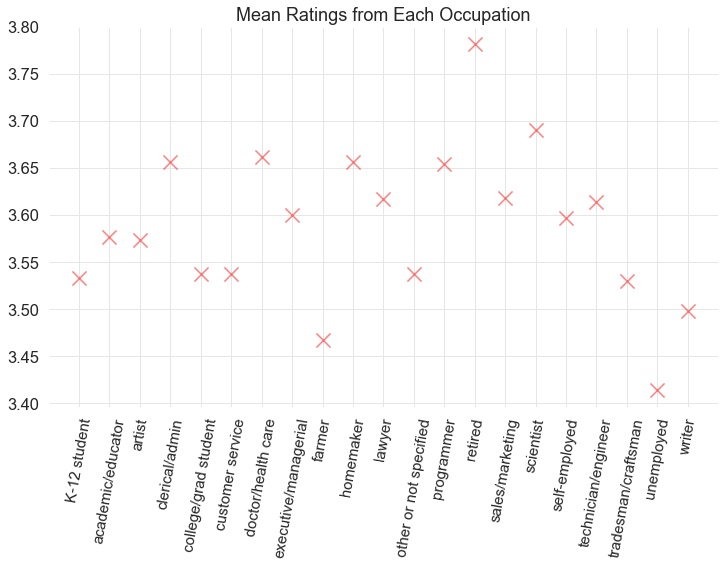

In [28]:
# Contributor/s: Praveen, Amit, Ashini, Vigneshwaran, Niranjana

# Computing the mean ratings for each occupation using groupby method
mean_ratings_from_each_occupation = lens_data.groupby("occupation").mean()["rating"]

# Saving name of the occupation and it's respective mean ratings into the variables
occupations = mean_ratings_from_each_occupation.index
mean_ratings = mean_ratings_from_each_occupation.values

# Scatter plot to show the mean ratings for each category
plt.title("Mean Ratings from Each Occupation")
plt.scatter(x=occupations, y=mean_ratings, c='red', s=200, alpha=0.5, marker = "x")
plt.xticks(rotation=80, fontsize = 15)

# To show the plot
plt.show()

**Observation:** We can see from the above graph that mean ratings given by any organization is in the range of 3.4 and 3.8

## Release Year Analysis

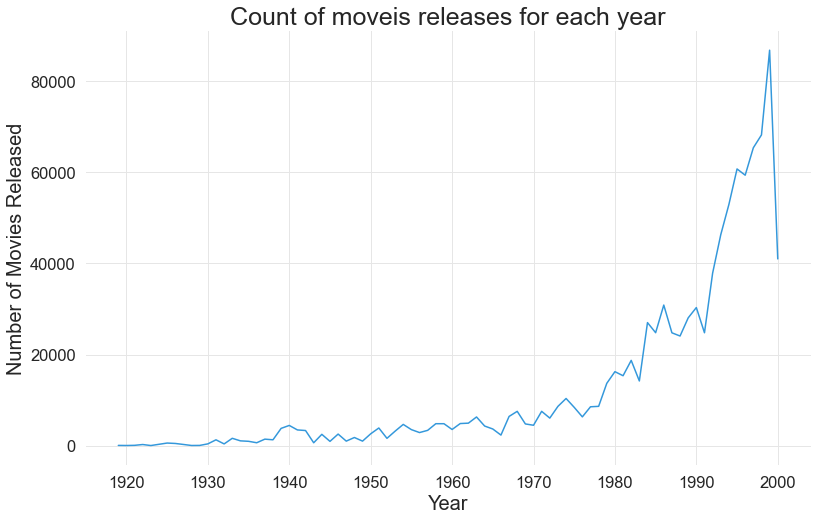

In [29]:
# Number of movies released in each year
no_of_movies_in_each_year = lens_data[["movie_title", "movie_release_year"]].groupby("movie_release_year").size()

year_counts = lens_data[["movie_title", "movie_release_year"]].groupby("movie_release_year").size()

fig, ax = plt.subplots(figsize=(13, 8)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # changes the number of xticks we see
plt.title("Count of moveis releases for each year", fontsize=25)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Number of Movies Released", fontsize=20)
plt.show()

**Observation:** We are able to see a sudden dip around the year 2000, further analysis can be conducted to study this dip

# Recommendation System

**Recommender System**:
<br/>
Recommender system encompasses the tasks in developing a learning algorithm that can automatically recommend products or service to human being or any agent. Two main types of recommender system are Content based and Collaborative filtering.

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/recmSys_Flow_Chart.png" />

A recommendation system helps users find compelling content in a large corpora. Yes, one can use search to access content. However, a recommendation engine can display items that users might not have thought to search for on their own

Fact: 60% of watch time on YouTube comes from recommendations.

**Content-Based**:
<br/>
This is one kind of learning algorithm that uses features of items to recommend other similar items. The goal behind content-based filtering is to classify products with specific keywords (in our case it's genre), correct keywords are extracted using the concept called TF-IDF. This TF-IDF concept is used in information retrievel system. Learning what the user likes is done by look up those terms in the database, and then recommend similar items. The similarity between items are calculated using a concept called cosine similarity. Content-based filtering does not require other users' data during recommendations.

Machine learning with natural language is faced with one major hurdle its algorithms usually deal with numbers. So we need to transform that text into numbers. This tranformation is called **text vectorization**


**TF-IDF**: *Term Frequency - Inverse Document Frequency*

tf-idf --> Pupose of tf-idf vectorizer is to find the most significant words in the document/sentence 
tf --> How frequently a word appears in a document/sentence. This does not consider the weight of the words appearing
idf --> It is a weight indicating how commonly a word is used. Lower score is given to the frequently occuring words. Lower the score, the less important the word becomes.

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/tf and idf formula.png" />

**Text book TF-IDF Formula**:
<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/TFIDF_FORMULA.png" />

<br/>
We will be making use of the concept of TF-IDF because when TF and IDF scores are multiplied we get a score that takes both frequency and the weight/importance of the word in our case it is genre into consideration. 



**Assumption:** Films that have the same genre can be catogorized as similar contents

In [30]:
# Contributor/s: Praveen, Ashini, Niranjana

# Break up the big genre string into a string array
movies_data['genres'] = movies_data['genres'].str.split('|')
# Convert genres to string value
movies_data['genres'] = movies_data['genres'].fillna("").astype('str')

In [31]:
# Contributor/s: Praveen, Ashini, Niranjana

# Importing the Vectorizer from sklearn
# TfidfVectorizer is a bag of words approach.
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer: Converts a collection of raw documents to a matrix of TF-IDF features
# Set analyzer to "word" for outputting words and phrases,
# N-gram means a sequence of N words
# ngram range is the min and max value, here we have (1,2) for one-word and two-word tokens so that they are included
# in our features
# stop_words to remove less-meaningful english words, this is a list of frequently occuring words that are not 
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')
# Genre data is provided to the algorithm and this data is tranfomred into vectors, this is then saved in the tfidf_matirx variable  
tfidf_matrix = tf.fit_transform(movies_data['genres'])

# Breaking down the tfidf_matrix for better understanding
print("Observations: ")
print("Number of unique words in the genre column: ", len(tf.vocabulary_))
print()
print("The encoding of the different words into numbers: ")
print(tf.vocabulary_)
print()
print("TF-IDF values for the first 3 vocabularies: ")
print("TF-IDF scores are displayed for each row, 0th row, 1st row, 2nd row and so on.. (mentioned as first element in tuple) \nand every second element are encoded words")
print("")
print(tfidf_matrix[:3])
print()
print("The top most significant words/genres based on tf-idf scores: ")
# Getting feature names from the vectorizer that holds the data passed as parameter, then it is declaring it as an 1d array
feature_array = np.array(tf.get_feature_names())
# Returns the indices that would sort an array in ascending order 
tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten() # tfidf_matrix is converted into 2d array and converted into 1d array
# Reverses the encoded features w.r.t tf-idf scores generated
tfidf_sorting = tfidf_sorting[::-1]
# Printing the top 5 genres with high tf-idf scores
top_5_genres = feature_array[tfidf_sorting][:5]
print(top_5_genres)

# Displaying the shape of the resultant matrix
print()
print("Shape of the tfidf_matrix: ", tfidf_matrix.shape)

Observations: 
Number of unique words in the genre column:  127

The encoding of the different words into numbers: 
{'animation': 29, 'children': 37, 'comedy': 45, 'animation children': 30, 'children comedy': 38, 'adventure': 14, 'fantasy': 83, 'adventure children': 16, 'children fantasy': 40, 'romance': 114, 'comedy romance': 54, 'drama': 72, 'comedy drama': 48, 'action': 0, 'crime': 59, 'thriller': 121, 'action crime': 5, 'crime thriller': 67, 'action adventure': 1, 'adventure thriller': 26, 'drama romance': 78, 'horror': 94, 'comedy horror': 51, 'adventure romance': 24, 'drama thriller': 80, 'action comedy': 4, 'crime drama': 60, 'sci': 119, 'fi': 88, 'drama sci': 79, 'sci fi': 120, 'adventure sci': 25, 'documentary': 68, 'war': 124, 'drama war': 81, 'musical': 100, 'children musical': 42, 'musical romance': 101, 'action drama': 6, 'mystery': 104, 'drama mystery': 77, 'fi thriller': 89, 'comedy crime': 46, 'crime horror': 63, 'horror thriller': 99, 'drama musical': 76, 'adventure dr

**Cosine Similarity:**
<br>
It is defines as the angle between two vectors in a multi-dimensional space. The above step, where we use the TfidVectorizer to get the matrix of vectors. Now the angle between these vectors should be measured to know how similar the vectors are. Smaller the angle higher the smilarity.   

The cosine similarity is proportional to the dot product of two vectors and inversely proportional to the product of their magnitudes and that is why we use cosine similarity instead of euclidean distance. 

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/Cosine_similarity_example_diagram.png" />

**Text Book Cosine Similarity Formula**
<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/Cosine_similarity.png" />
<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/cosine_similarity_2.png" />

Inner product of both vectors are taken and these vectors are scaled. This gives cosine between vectors

In [32]:
# Contributor/s: Praveen, Ashini, Niranjana

# Import time module to compare two executions 
import time

# cosine_similarity: computes the cosine similarity and gives a pairwise cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity 
# Start time 
start_time_for_cosine_similarity = time.time()
# Cosine similarity calculates the angle between the vectors (vectors are taken from the matrix 2d arr. supplied into it) 
# and then converted into a number that lies between 0 and 1 with the help of cosine*(angle between two vectors)
cosine_similarity1 = cosine_similarity(tfidf_matrix) # 2d arr. of similarity values 
# End time
end_time_for_cosine_similarity = time.time()
# Computing the process time 
time_elapsed_for_cosine_similarity = (end_time_for_cosine_similarity-start_time_for_cosine_similarity)

# Displaying the results
print("Array of cosine similarities using method 1: ")
print(cosine_similarity1[:4, :4])
print()
print("Time elapsed when cosine similarity is used:", round(time_elapsed_for_cosine_similarity,4), "seconds")

Array of cosine similarities using method 1: 
[[1.         0.14193614 0.09010857 0.1056164 ]
 [0.14193614 1.         0.         0.        ]
 [0.09010857 0.         1.         0.1719888 ]
 [0.1056164  0.         0.1719888  1.        ]]

Time elapsed when cosine similarity is used: 0.0778 seconds


In [33]:
# Contributor/s: Praveen, Ashini, Niranjana

# Second approach to find the similarity 
from sklearn.metrics.pairwise import linear_kernel
# Start time
start_time_for_linear_kernel = time.time()
cosine_similarity2 = linear_kernel(tfidf_matrix, tfidf_matrix)
# End time
end_time_for_linear_kernel = time.time()
# Computing the process time
time_elapsed_for_linear_kernel = (end_time_for_linear_kernel-start_time_for_linear_kernel)

# Displaying the results
print("Array of cosine similarities using method 2: ")
print(cosine_similarity2[:4, :4])
print()
print("Time elapsed when cosine similarity is used:", round(time_elapsed_for_linear_kernel,4), "seconds")

Array of cosine similarities using method 2: 
[[1.         0.14193614 0.09010857 0.1056164 ]
 [0.14193614 1.         0.         0.        ]
 [0.09010857 0.         1.         0.1719888 ]
 [0.1056164  0.         0.1719888  1.        ]]

Time elapsed when cosine similarity is used: 0.0798 seconds


**Observation:** Above two approaches demonstrate 2 methods for computing the cosine simlarity between the vectors, both give the same pairwise cosine similarity matrix for all the movies in the dataset. There is small analysis made here to find the time elapsed by both processes to finish. During most observations, the time taken by the linear_kernel (2nd method) was found to be faster than the cosine_similarity (1st method)   

In [34]:
# Contributor/s: Praveen, Ashini, Niranjana

# Variable containing a the title column without its indices
titles_of_movies = movies_data['title']
# 1d array created using pandas Series with movie titles
series_of_movies_as_indices = pd.Series(data = movies_data.index, index = titles_of_movies)

# Funtion to get the top 10 similar movies based on the scores generated 
def recommendation_based_on_genre(input_movie_title):
    movie_index = series_of_movies_as_indices[input_movie_title]
    # Similarity scores are pulled from the linear kernel and the moves are enumerated and listed for sorting 
    sorted_scores_similar_movies = sorted(list(enumerate(cosine_similarity2[movie_index])),
                                          reverse=True,
                                          key=lambda x: x[1])
    # Top 10 movies sorted based on genre similarity scores 
    top_ten_similar_movies = sorted_scores_similar_movies[1:11]
    # List comprehension for containing  indices of the top 10 similar movies
    movie_indices = [i[0] for i in top_ten_similar_movies]
    # Returns the name of movies from the titles column for the matching index
    return titles_of_movies.iloc[movie_indices]

In [35]:
# Contributor/s: Praveen, Ashini, Niranjana

# Test list that contains random movies 
content_based_test_list = ["Jumanji (1995)", "Pinocchio (1940)", "Walking Dead, The (1995)", "Othello (1995)"]

# Iterate over the test list to print its recommendations
for test_movie in content_based_test_list:
        print('Top 10 content based recommendations of ' + test_movie + ' are: ')
        print()
        print(recommendation_based_on_genre(test_movie))
        print("******************************************************************************************************")


Top 10 content based recommendations of Jumanji (1995) are: 

55                         Kids of the Round Table (1995)
59                     Indian in the Cupboard, The (1995)
124                     NeverEnding Story III, The (1994)
996                       Escape to Witch Mountain (1975)
1898                                     Labyrinth (1986)
1936                                  Goonies, The (1985)
1974            Darby O'Gill and the Little People (1959)
2092                        NeverEnding Story, The (1984)
2093    NeverEnding Story II: The Next Chapter, The (1...
2330                        Santa Claus: The Movie (1985)
Name: title, dtype: object
******************************************************************************************************
Top 10 content based recommendations of Pinocchio (1940) are: 

241                               Gumby: The Movie (1995)
310                             Swan Princess, The (1994)
592                                      Pinocch

**Limitations observed in Content Based Recommendation System:** 
    - Content based recommendation is purely base on the genre in the dataset.
    - What this means is, the same list of recommendations are displayed to any kind of user
    - This makes the system less personal

**Collaborative Filtering**

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/Content_based_ani..gif" />



The content based recommendation system is fairly simple approach for solving the recommendation problem. This said to be simple because content-based filtering takes only the movie genre into considereation. Since the collaborative filtering system makes use of the similarities between the users or the items or both users and items, this approach helps in overcoming the limitation of content based system specified above.


With this similarity matrix we can now predict the ratings that were not included with the data.

### User-user collaborative filtering approach - I

In [36]:
# Contributor/s: Ashini, Niranjana

# The below function calculates the cosine similarity between the input user and all the other users in the dataframe
def calculate_cosine(centered_rating_pivot, input_user_data, all_user_values):
  cosine_similarity_list = list();
  vector_magnitude_1 = np.sqrt(sum(np.square(x) for x in input_user_data))

  idx = 0
  # Calculates the Cosine formula 
  # cosTheta = [vector(A).vector(B)] / [magnitude(vector A) * magnitude(vector B)]
  for each_user in all_user_values:
    dot_product = [x*y for x,y in zip(input_user_data, each_user)]
    vector_magnitude_2 = np.sqrt(sum(np.square(x) for x in each_user))
    cos_theta = sum(dot_product) / (vector_magnitude_1 * vector_magnitude_2)
    cosine_similarity_list.append((centered_rating_pivot.index[idx] - 1, cos_theta))
    idx += 1

  cosine_similarity_list.sort(key=lambda x: x[1], reverse=True)
  return cosine_similarity_list[0:11]

# This function is used to get the top 10 users from the dataframe, who are most similar to the input user.
def getTopSimilarUsers(userID):
  mean_user_rating = lens_data.groupby(['user_id'], as_index = False, sort = False).mean().rename(columns = {'rating': 'mean_rating'})[['user_id','mean_rating']]
  
  # merging lens_data and mean by user_id
  rating = pd.merge(lens_data, mean_user_rating, on="user_id", how = "left", sort="False")
  
  # making a new column rating_adjusted by subtracting rating_mean from rating
  rating["centered_rating"] = lens_data['rating'] - rating['mean_rating']
  
  # creating a new data frame result with user, movie and rating
  centered_rating_df = pd.DataFrame({"user_id": lens_data['user_id'],
                        "movie_id": lens_data['movie_id'],
                        "centered_rating": rating['centered_rating']})
  
  # creating a pivot table with user_id and movie_id
  centered_rating_pivot = centered_rating_df.pivot_table(index = 'user_id', columns='movie_id', values='centered_rating').fillna(0)
  centered_rating_pivot.sort_values(by='user_id')
  all_user_values = centered_rating_pivot.values
  input_user_data = all_user_values[userID]
  return calculate_cosine(centered_rating_pivot, input_user_data, all_user_values)

In [37]:
# Contributor/s: Ashini, Niranjana

# Input user to whom recommendation needs to be done
userID = 3333
# Movies already watched and rated by the user 
input_user_movie = [movie for movie in lens_data[lens_data['user_id'] == userID]['movie_title']]
# Finding top 10 similar Users based on centered cosine 
start_time_for_user_user = time.time()
top_10_users = getTopSimilarUsers(userID)
end_time_for_user_user = time.time()
time_elapsed_for_user_user = (end_time_for_user_user - start_time_for_user_user)

print("Time elapsed when User-User collaborative filtering is used:", round(time_elapsed_for_user_user, 4), "seconds")

Time elapsed when User-User collaborative filtering is used: 54.4761 seconds


In [38]:
# Contributor/s: Ashini, Niranjana

# Removing the users self comparison cosine value.
top_10_users.sort(key = lambda x: x[1])
top_10_users.pop()
print(top_10_users)

[(331, 0.19765949144114517), (81, 0.19814419865505015), (3780, 0.19980205323294392), (594, 0.20129786768055477), (5105, 0.20389952707936057), (5912, 0.20880001554656186), (3920, 0.2114037281518672), (4171, 0.22588910118494743), (232, 0.22912200211891076), (5656, 0.28081333974503747)]


In [39]:
# Contributor/s: Ashini, Niranjana

similar_10_user_Id = [eachUser[0] for eachUser in top_10_users]
Top_10_df = lens_data[lens_data['user_id'].isin(similar_10_user_Id)]

Top_10_df = Top_10_df[Top_10_df['rating'] > 4]
Top_10_df.sort_values(by='rating', ascending=False)

,movie_id,movie_title,movie_release_year,genres,rating,user_id,gender,age_group,occupation,zipcode
22,1193,One Flew Over the Cuckoo's Nest,1975,Drama,5,81,F,25-34,other or not specified,60640
642141,1206,"Clockwork Orange, A",1971,Sci-Fi,5,5912,M,25-34,academic/educator,77064
627494,3863,"Cell, The",2000,Sci-Fi|Thriller,5,331,M,25-34,executive/managerial,55902
628698,3503,Solaris,1972,Drama|Sci-Fi,5,5656,M,25-34,scientist,03755
630276,247,Heavenly Creatures,1994,Drama|Fantasy|Romance|Thriller,5,331,M,25-34,executive/managerial,55902
...,...,...,...,...,...,...,...,...,...,...
281527,2599,Election,1999,Comedy,5,232,M,25-34,writer,55408
281143,2952,Hard 8,1996,Crime|Thriller,5,331,M,25-34,executive/managerial,55902
280546,3100,"River Runs Through It, A",1992,Drama,5,331,M,25-34,executive/managerial,55902
278604,1719,"Sweet Hereafter, The",1997,Drama,5,331,M,25-34,executive/managerial,55902


In [40]:
# Contributor/s: Ashini, Niranjana

# Output for User 3333

final_recommendation = set();
recommendation_count = 0
for movies in Top_10_df['movie_title']:
  if (movies not in input_user_movie and len(final_recommendation) < 10): 
    recommendation_count += 1
    final_recommendation.add(movies)

print("Top 10 movies recommended for the user based on their interests are: \n")
top_10_recommendation = pd.DataFrame()
for value in final_recommendation:
  #print(value)
  top_10_recommendation = pd.DataFrame(lens_data[lens_data['movie_title'] == value])
  val = set(top_10_recommendation['genres'])
  print(value + "- " + str(val))

Top 10 movies recommended for the user based on their interests are: 

Schindler's List - {'Drama|War'}
My Fair Lady - {'Musical|Romance'}
Princess Bride, The - {'Action|Adventure|Comedy|Romance'}
James and the Giant Peach - {"Animation|Children's|Musical"}
Sound of Music, The - {'Musical'}
Wizard of Oz, The - {"Adventure|Children's|Drama|Musical"}
Snow White and the Seven Dwarfs - {"Animation|Children's|Musical"}
Bambi - {"Animation|Children's"}
Pleasantville - {'Comedy'}
Ben-Hur - {'Action|Adventure|Drama'}


### User-user collaborative filtering approach - II

We had to take try the second approach because the first appraoch was little inefficient

- Select a user with the movies the user has watched
- Add movieIds to the movies watched by the user for easy recommendation
- Based on his rating to movies, find the top X neighbours
- Get the watched movie record of the user for each neighbour.
- Calculate a similarity score using some formula
- Recommend the items with the highest score

In [41]:
# Creating a scenario where an imaginary user has watched some movies and wants some personalized recommendations 
# Assuming that the imaginary user has watched 5 movies and has given some ratings as follows

# Creating a dictionary that contains a movies and its ratings for creating a dataframe
user = [
            {'title':'Breakfast Club, The (1985)', 'rating':4},
            {'title':'Toy Story (1995)', 'rating':2.5},
            {'title':'Jumanji (1995)', 'rating':3},
            {'title':"Pulp Fiction (1994)", 'rating':4.5},
            {'title':'Akira (1988)', 'rating':5}
         ] 
# Dataframe is created using the pandas.DataFrame()
input_movie = pd.DataFrame(user)
# Displays the dataset that acts as an input for testing the collaborative filtering 
input_movie

,title,rating
0,"Breakfast Club, The (1985)",4.0
1,Toy Story (1995),2.5
2,Jumanji (1995),3.0
3,Pulp Fiction (1994),4.5
4,Akira (1988),5.0


In [42]:
# Pulling the movie ID for each movie that is in our input dataset

# Checks if each title is present in titles listed in the inputMovie dataset and create a new dataframe to 
# hold those movie IDs
dataframe_with_id = movies_data[movies_data['title'].isin(input_movie['title'].tolist())]
# Dataframe that we obtained to have the movie_id is merged with the inputMovie w.r.t the title so that we have 
# a input df with the movie IDs
input_movie = pd.merge(dataframe_with_id, input_movie) # Merged dataframe is saved into the inputMovie variable
# Dropping the not so important column
input_movie = input_movie.drop('genres', 1)

# Displaying the resultant dataframe with cooked up values along with the movie_id info
input_movie

,movie_id,title,rating
0,1,Toy Story (1995),2.5
1,2,Jumanji (1995),3.0
2,296,Pulp Fiction (1994),4.5
3,1274,Akira (1988),5.0
4,1968,"Breakfast Club, The (1985)",4.0


In [43]:
# Since we do not require timestamp information we can drop it
ratings_data2 = ratings_data.drop("timestamp",axis = 1) #.drop() drop the specified column 

# Next step is to filter the ratings dataframe to get the user IDs who have watched only the movies in input dataset
users_who_have_watched_input_movies = ratings_data2[ratings_data2['movie_id'].isin(input_movie['movie_id'].tolist())]
# Displays the top 5 observations
print("Dataset that contains the users who have watched movies listed in input dataframe: ")
print(users_who_have_watched_input_movies.head())
print()

# Grouping the dataframe based on user ID to have to find the top most similar users to the input user
userid_grouped = users_who_have_watched_input_movies.groupby(['user_id'])

# Users are grouped and the dataframe of movies that a specific user has watched can be obtained by using .get_group()
print("Movies watched and respective ratings given by user id-> 463: ")
print(userid_grouped.get_group(463))
# The similar users to the input user dataframe can be obatined from this dataset grouped by user's ID

Dataset that contains the users who have watched movies listed in input dataframe: 
     user_id  movie_id  rating
40         1         1       5
174        2      1968       2
230        3      1968       4
285        5       296       4
463        6       296       2

Movies watched and respective ratings given by user id-> 463: 
       user_id  movie_id  rating
69160      463         1       5
69252      463      1968       4


**Observation**: From the above table we can see that the user 463 has watched movie 1 (Toy Story (1995)) and movie 1968 (Breakfast Club, The (1985)) and the respective ratings are 5 and 4

In [44]:
# Sorting userid_grouped so that users with movie most in common with the input will have priority

# Sorting is done based on no. of movies watched by each user(second element)--> reason for using: x[1]  
userid_grouped = sorted(userid_grouped,  key=lambda x: len(x[1]), reverse=True) # sorted() will sort and save it in new list

# Displays the top 5 sorted users and the information that they provide 
print("Users with more number of common movies watched are displayed: ")
userid_grouped[:5]

Users with more number of common movies watched are displayed: 


[(18,
        user_id  movie_id  rating
  1966       18         1       4
  1967       18         2       2
  2004       18      1274       5
  2098       18      1968       5
  2125       18       296       5),
 (48,
        user_id  movie_id  rating
  6544       48         1       4
  6545       48         2       3
  6582       48      1274       4
  6952       48      1968       4
  6980       48       296       4),
 (272,
         user_id  movie_id  rating
  40164      272         1       5
  40165      272         2       2
  40195      272      1274       3
  40493      272      1968       4
  40522      272       296       5),
 (284,
         user_id  movie_id  rating
  41577      284         1       5
  41578      284         2       3
  41619      284      1274       5
  41882      284      1968       3
  41912      284       296       5),
 (424,
         user_id  movie_id  rating
  62411      424         1       4
  62412      424         2       4
  62457      424      1274

**Pearson Correlation Coefficient**

The next step is to compare the sorted users that we have with the imaginary user (data) that we have created for input. This comparison lets us know how similar the data is. The popular method for computing the similarity is Pearson Correlation Coefficient. Reaon for chooing the Pearson correlation is that it gives the magnitute (how strong the values are related to each other) and also the direction of the relationship (-ve or +ve). This measures the strength of linear association between two varibles passed. From the below diagram we can see how the Pearson Correlation Coefficient for different plots. They basically give a value to the relationship the variables have:

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/Correlation_coefficient.png" />

**Formula for Pearson Correlation Coefficient**:

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/pearson_formula.gif" />

**Observation**
The above formula find the covariance between two variables and this is divided by the product of standard deviation of the same variables 

In [45]:
# Importing Math library
import math

# Empty dictionary created to hold the Pearson Correlation values after computation
pearson_correlation_values = {}

# temp = input_movie[input_movie['movie_id'].isin(group['movie_id'].tolist())]
# temp["rating"].tolist()

# Iterating over each user ID and group of movies that he/she has watched 
for name, group in userid_grouped:
    # Sorting the userid_grouped w.r.t the movie_id so that values aren't mixed up
    group = group.sort_values(by='movie_id')
# Sorting the input movie dataframe w.r.t movie_id so that this aligns with group that we have sorted previously
    input_movie = input_movie.sort_values(by='movie_id')

    # Checking if movie ID in group is also in input_movie dataframe
    temp = input_movie[input_movie['movie_id'].isin(group['movie_id'].tolist())]
    # And then store them in a buffer variable which is in list format which will help in PC calculations
    temp_rating_list = temp['rating'].tolist() # Pulling the each rating from the ratings columns and converting it as list
    # Ratings given for each movie by each user in the "group" will taken and converting it as list
    temp_group_list = group['rating'].tolist()

    # Length of each group is computed for using it as 'n' in the PC formula
    n = len(group)
    # Calculating Pearson Correlation between two users x and y 
    # Calculates the 1st component: finding difference between two lists using list comprehension
    Sxx = sum([i**2 for i in temp_rating_list]) - pow(sum(temp_rating_list),2)/float(n)
    # Calculates the 2nd component: finding difference between two lists using list comprehension
    Syy = sum([i**2 for i in temp_group_list]) - pow(sum(temp_group_list),2)/float(n)
    # Calculates Sxy by finding difference between summations 
    Sxy = sum( i*j for i, j in zip(temp_rating_list, temp_group_list)) - sum(temp_rating_list)*sum(temp_group_list)/float(n)
    
    # If the denominator is not zero then it is divided, else--> 0 correlation
    if Sxx != 0 and Syy != 0: # product of Sxx and Syy cannot be a zero for division
    # Stores into the dictionary created
        pearson_correlation_values[name] = Sxy/math.sqrt(Sxx*Syy)
    else: # Else PC is declared as 0 (no correlation) 
    # Stores into the dictionary created
        pearson_correlation_values[name] = 0

In [46]:
# Displaying the Pearson Correlation values that were added into the dictionary created in above step
pearson_correlation_values.items() # The PC values for each user is shown

dict_items([(18, 0.6842472173461618), (48, 0.4313310928137531), (272, -0.036986336072765996), (284, 0.26413527189768793), (424, 0.3774147062120368), (549, 0.17049858486761843), (550, 0.4313310928137531), (624, -0.0864585626556345), (678, -0.24041118447297505), (780, 0.6819943394704737), (877, 0.057639041770424365), (1010, 0.7777316339209677), (1101, -0.0864585626556345), (1112, 0.1968748077395395), (1120, 0.0864585626556345), (1230, 0.6469966392206334), (1246, 0.518751375933811), (1264, -0.0864585626556345), (1298, -0.8524929243380921), (1303, 0.6309898162000303), (1317, 0.5114957546028552), (1635, 0.37741470621203593), (1676, 0.4313310928137521), (1680, 0.8364283610093444), (1733, 0.6890618270883883), (1884, 0.5114957546028552), (1943, 0.5114957546028552), (2010, 0.7781270639007182), (2015, 0.8000553690695199), (2054, -0.7263719977186395), (2063, 0.10783277320343994), (2181, -0.31438385661850704), (3101, 0.6340294594746598), (3163, 0.26413527189768443), (3311, 0.78178760572493), (3312

In [47]:
# Converting the data from the dictionary into a dataframe using Pandas
pearson_DF = pd.DataFrame.from_dict(pearson_correlation_values, orient='index')
# # Naming the column as "similarity Index"
pearson_DF.columns = ['similarityIndex']
# Using the index and pulling its values to set User ID for each similarity index
pearson_DF['userId'] = pearson_DF.index
# Printing the 'before' dataframe 
print("Before: ")
print(pearson_DF)
print("****************************************************")
# Resets the index from 0 to the length actual dataframe
pearson_DF.index = range(len(pearson_DF))
# Printing the 'after' dataframe 
print("After: ")
print(pearson_DF)
print("****************************************************")

# Displaying top 5 observations
print("Resulting dataframe: ")
pearson_DF.head()

Before: 
      similarityIndex  userId
18           0.684247      18
48           0.431331      48
272         -0.036986     272
284          0.264135     284
424          0.377415     424
...               ...     ...
6013         0.000000    6013
6023         0.000000    6023
6025         0.000000    6025
6032         0.000000    6032
6037         0.000000    6037

[3679 rows x 2 columns]
****************************************************
After: 
      similarityIndex  userId
0            0.684247      18
1            0.431331      48
2           -0.036986     272
3            0.264135     284
4            0.377415     424
...               ...     ...
3674         0.000000    6013
3675         0.000000    6023
3676         0.000000    6025
3677         0.000000    6032
3678         0.000000    6037

[3679 rows x 2 columns]
****************************************************
Resulting dataframe: 


,similarityIndex,userId
0,0.684247,18
1,0.431331,48
2,-0.036986,272
3,0.264135,284
4,0.377415,424


In [48]:
# Variable holds top 50 similarity observations in sorted order w.r.t similarity index column
top_users_based_on_similarity = pearson_DF.sort_values(by='similarityIndex', ascending=False)[0:50]

# Showing top 5 sorted observations
top_users_based_on_similarity.head()

,similarityIndex,userId
591,1.0,3080
473,1.0,1693
689,1.0,3942
1839,1.0,5421
945,1.0,152


In [49]:
# Merging the ratings data with the sorted similarity dataframe
top_users_and_ratings = top_users_based_on_similarity.merge(ratings_data, left_on='userId', right_on='user_id', how='inner')

# Displays the top observations
top_users_and_ratings.head()

,similarityIndex,userId,user_id,movie_id,rating,timestamp
0,1.0,3080,3080,2987,4,976302495
1,1.0,3080,3080,1249,4,969810885
2,1.0,3080,3080,574,4,969811583
3,1.0,3080,3080,1250,5,976307058
4,1.0,3080,3080,3793,3,1008794793


In [50]:
# Calculating the weighted ratings by multiplying the similarity by the user's ratings so that the 
# similarity value influences the ratings 
top_users_and_ratings['weightedRating'] = top_users_and_ratings['similarityIndex']*top_users_and_ratings['rating']

# Displays top 5 observations
top_users_and_ratings.head()

,similarityIndex,userId,user_id,movie_id,rating,timestamp,weightedRating
0,1.0,3080,3080,2987,4,976302495,4.0
1,1.0,3080,3080,1249,4,969810885,4.0
2,1.0,3080,3080,574,4,969811583,4.0
3,1.0,3080,3080,1250,5,976307058,5.0
4,1.0,3080,3080,3793,3,1008794793,3.0


In [51]:
# Summing the values of similarity_index and weighted_rating after grouping the Df by user ID
temp_top_user_rating = top_users_and_ratings.groupby('movie_id').sum()[['similarityIndex','weightedRating']]
# Updating the name of the columns respectively 
temp_top_user_rating.columns = ['sum_of_similarity_Index','sum_of_weighted_Rating']

# Displays top 5 observations
print("Dataframe with Sum of similarity index and sum of weighted ratings for each movie: ")
temp_top_user_rating.head()

Dataframe with Sum of similarity index and sum of weighted ratings for each movie: 


,sum_of_similarity_Index,sum_of_weighted_Rating
movie_id,,
1,25.0,86.0
2,10.0,28.0
3,4.0,15.0
4,2.0,5.0
5,3.0,10.0


In [52]:
# Creating an empty dataframe
recommendation_df = pd.DataFrame()

# Calculating weighted average scores for each movie by using the weighted avg. formula
recommendation_df['weighted average recommendation score'] = temp_top_user_rating['sum_of_weighted_Rating']/temp_top_user_rating['sum_of_similarity_Index']
# Setting movie ID as index for the dataframe
recommendation_df['movieId'] = temp_top_user_rating.index

# Display top 5 observation
recommendation_df.head()

,weighted average recommendation score,movieId
movie_id,,
1,3.440000,1
2,2.800000,2
3,3.750000,3
4,2.500000,4
5,3.333333,5


In [53]:
# Above Df is sorted w.r.t weighter average of recommendation scores in descending order
final_recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)

# Top 10 recommendations for the input dataset (imaginary user) displayed
final_recommendation_df.head(10)

,weighted average recommendation score,movieId
movie_id,,
1414,5.0,1414
2261,5.0,2261
116,5.0,116
1935,5.0,1935
1175,5.0,1175
962,5.0,962
240,5.0,240
2932,5.0,2932
960,5.0,960


In [54]:
# Since this is sorted in decending order, we can see the top 10 recommendations for the imaginary inpur user
# along with their genres
movies_data.loc[movies_data['movie_id'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']
5,6,Heat (1995),"['Action', 'Crime', 'Thriller']"
6,7,Sabrina (1995),"['Comedy', 'Romance']"
9,10,GoldenEye (1995),"['Action', 'Adventure', 'Thriller']"
10,11,"American President, The (1995)","['Comedy', 'Drama', 'Romance']"
11,12,Dracula: Dead and Loving It (1995),"['Comedy', 'Horror']"


**Observation:** Looks like the recommendations has given us list of movies with **Comedy** as a the most common genre. We will be able to vallidate our work qualitatively but not by quantitaive measures 

**Next Step**
<br>
Since we have not done any validations on the implementations that we have seen till now, we will perform the validation on both user-user and item-item collaborative filtering as a next step with different implementation.

### Item-item and user-user collaborative filtering and its validation

In [55]:
# Fill NaN values in user_id and movie_id column with 0
ratings_data['user_id'] = ratings_data['user_id'].fillna(0)
ratings_data['movie_id'] = ratings_data['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings_data['rating'] = ratings_data['rating'].fillna(ratings_data['rating'].mean())

In [56]:
# We remove the time stamp to make it simpler
ratings_data2 = ratings_data.drop("timestamp", axis=1)

# Randomly sample is pulled from the big dataset we have
sample_data = ratings_data2.sample(frac=0.02) # 20% of data is chosen from the dataset
# Check the sample info
print(sample_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 585611 to 705336
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   20004 non-null  int64
 1   movie_id  20004 non-null  int64
 2   rating    20004 non-null  int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [57]:
# Using train_test_split to split the dataset into testing and training. 
from sklearn.model_selection import train_test_split
# 20% of the data will randomly slected for testing purpose and the rest of the data will be saved as traing
training_data, testing_data = train_test_split(sample_data, test_size=0.2, random_state=101)

print(f"No. of observations in training data: {training_data.shape[0]}")
print(f"No. of observations in testing data: {testing_data.shape[0]}")

No. of observations in training data: 16003
No. of observations in testing data: 4001


In [58]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = training_data.values
test_data_matrix = testing_data.values

# Check their shape
print("Shape of train data: ", train_data_matrix.shape)
print("Shape of test data: ", test_data_matrix.shape)

Shape of train data:  (16003, 3)
Shape of test data:  (4001, 3)


Pearson Correlation Coefficient can be calculated with the help of sklearn library, unlike the previous method which was done manualy. Pairwise_distances function from sklearn has to be called to calculate PC.

In [59]:
# Pearson Coefficient calculated using pairwise_distance
from sklearn.metrics.pairwise import pairwise_distances

# Import time module to compare two executions 
import time

# start time
start_time = time.time()
# User Similarity Matrix: Created using the pairwise_distances that calculates the Pearson Correlation Coefficient 
user_correlation = 1 - pairwise_distances(training_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0

# end time
end_time = time.time()

# Time taken for the complete process to be done
print("Total seconds taken to build user similarity matrix with PC values: ",round((end_time-start_time),2))
print() # empty line

# Prints the User Similarity matrix with 4 rows and 4 columns
print("User Similarity matrix with 4 rows and 4 columns: ")
print(user_correlation[:4, :4])

Total seconds taken to build user similarity matrix with PC values:  3.9

User Similarity matrix with 4 rows and 4 columns: 
[[1.         0.50142166 0.82810415 0.85189721]
 [0.50142166 1.         0.90023993 0.88027436]
 [0.82810415 0.90023993 1.         0.99903742]
 [0.85189721 0.88027436 0.99903742 1.        ]]


With this similarity matrix we can now predict the ratings that were not included with the data.

In [60]:
# Item Similarity Matrix
# Reason for transposing the training data: 
item_correlation = 1 - pairwise_distances(training_data.T, metric='correlation')
# Nan values are changed to 0
item_correlation[np.isnan(item_correlation)] = 0

# Prints the item similarity matrix
print("Item Similarity matrix : ")
print(item_correlation[:4, :4])

Item Similarity matrix : 
[[ 1.         -0.01581783  0.02040715]
 [-0.01581783  1.         -0.06590825]
 [ 0.02040715 -0.06590825  1.        ]]


In [61]:
# Function to predict ratings
def predict_ratings(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        prediction_result = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        # Dot product between ratings matrix and similarity scores is performed and divided by the array of similarities
        prediction_result = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return prediction_result

**Root Mean Squared Error:**

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed

<img src = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main/DSCI%20final%20project/RMSE_formula_1.jfif" />

Since we have got qutitative values to compare, we can make use of RMSE to calculate the error of the model 

In [62]:
# Importing the mean squared error
from sklearn.metrics import mean_squared_error
# Square root is taken on the calculated mean squared error 
from math import sqrt

# Function to calculate RMSE by passing the predictions and acutals
def rmse(prediction, actual_value):
    # Ignore nonzero terms and make the array as 1d
    prediction = prediction[actual_value.nonzero()].flatten()
    # Ignoring the nonzero terms and make the array 1d
    actual_value = actual_value[actual_value.nonzero()].flatten() 
    # Computes the square root of the MSE
    return sqrt(mean_squared_error(prediction, actual_value))

In [63]:
# Predict ratings on the training data with both similarity score
user_prediction = predict_ratings(train_data_matrix, user_correlation, type='user')
item_prediction = predict_ratings(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1430.0514839877603
Item-based CF RMSE: 1644.7297970885045


**Observation** We can see that the User based collaborative filtering has lower RMSE when compared to item based method

Drawbacks:
- When new user enters the system, we will not be able to recommend movies to him/her
- If new movie without any ratings data is added, the model's performance will be bad
- The performace will be bad with sparse data, meaning it's hard to find users that have rated the same items
- It tends to recommend items that are popular